In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

動画の48分くらいで紹介されているデータを模倣する。

In [2]:
data1 = np.array([
    [2, 8], [4, 9], [5, 2], [5, 8], [6, 10], [7, 1], [7, 3],
    [8, 2], [9, 3], [9, 4], [9, 9], [10, 4], [10, 7], [11, 5]
])
data2 = np.array([
    [3, 3], [3, 6], [4, 5], [5, 4],
    [5, 6], [7, 5], [7, 7], [9, 6]
])

X = np.concatenate([data1, data2], axis=0)
y = np.array([0] * len(data1) + [1] * len(data2))

# [a, b] -> [a, b, a^2, ab, b^2]
poly = PolynomialFeatures(degree=2, include_bias=False)

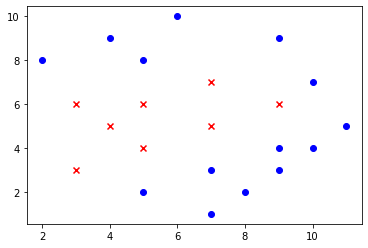

In [3]:
plt.scatter(data1[:, 0], data1[:, 1], c='blue', marker='o')
plt.scatter(data2[:, 0], data2[:, 1], c='red', marker='x')
plt.show()

学習を行う。

In [4]:
clf_orig = LogisticRegression()
clf_orig.fit(X, y)

clf_poly = LogisticRegression()
clf_poly.fit(poly.fit_transform(X), y)

LogisticRegression()

決定境界をそれぞれ描画する。

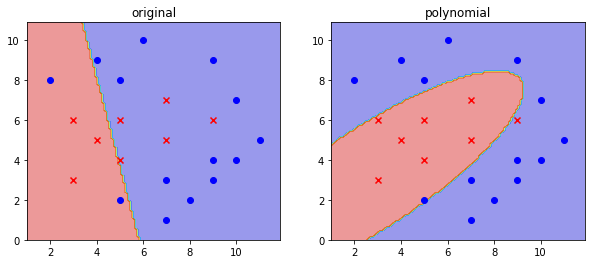

In [5]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.figure(figsize=(10, 4))
for idx, clf, title in zip([1, 2], [clf_orig, clf_poly], ['original', 'polynomial']):
    data = np.c_[xx.ravel(), yy.ravel()]
    data = data if title == 'original' else poly.fit_transform(data)
    Z = clf.predict(data)
    Z = Z.reshape(xx.shape)

    ax = plt.subplot(1, 2, idx)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='jet')
    ax.scatter(data1[:, 0], data1[:, 1], c='blue', marker='o')
    ax.scatter(data2[:, 0], data2[:, 1], c='red', marker='x')
    ax.set_title(title)